# DSCI 352 Lab 00 - Aidan Miltner

I first installed statsmodels and then imported all of the relevant libraries.

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/opt/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


This is the example given to us by the professor where we take random values for x and y and create a linear regression and then plot the results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4864
Date:                Tue, 25 Jan 2022   Prob (F-statistic):              0.489
Time:                        19:36:32   Log-Likelihood:                -69.896
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0402      0.142     -0.283      0.7

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


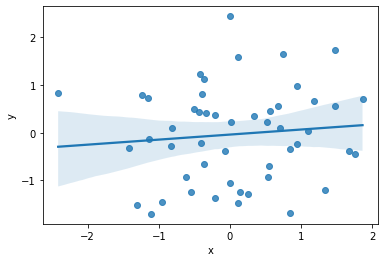

In [3]:
# Create a dataframe with columns named 'x' and 'y' filled with random numbers
df = pd.DataFrame({"x": np.random.normal(size=50), "y": np.random.normal(size=50)})

# Create an ordinary least squares regression on the data and show summary statistics.
# This formula regresses column 'y' on 'x'
ro = sm.OLS.from_formula("y ~ x", df)
res = ro.fit()
print(res.summary())

# Plot the data
sns.regplot('x', 'y', df)
plt.show()

However, we want to have actual values for x and y instead of random numbers. So, we first need to read the advertising csv file using pandas. Then, using .info() and .describe() we can get a general picture of what our data looks like.

In [4]:
DATA_ROOT = ''

advertising = pd.read_csv(DATA_ROOT+'Advertising.csv')
advertising.info()
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        19:36:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


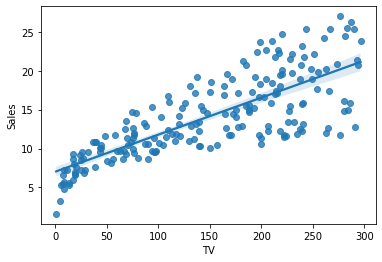

In [5]:
# Created a dataframe with columns named 'TV' and 'Sales' filled with TV data (x) and sales data (y) from 
# the advertising csv.
df = pd.DataFrame({"TV": advertising['TV'], "Sales": advertising['sales']})

# Created an ordinary least squares regression on the data and show summary statistics.
# This formula regresses column 'Sales' on 'TV'.
ro = sm.OLS.from_formula("Sales ~ TV", df)
res = ro.fit()
print(res.summary())

# Plot the data
sns.regplot('TV', 'Sales', df)
plt.show()

The above regression between TV and Sales gives us an R-Squared value of 0.612 and a p-value for TV of 0.000. This tells us that lots of the variance is explained by the model (about 60%) and that our TV variable is significant. Looking at the graph, we can see that the regression seems to fit the data pretty well, especially for small values of TV budget.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           4.35e-19
Time:                        19:36:33   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


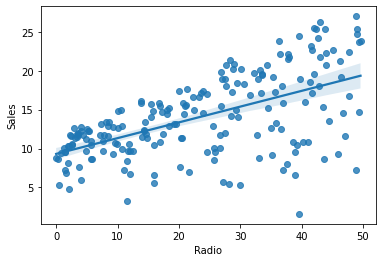

In [6]:
# Created a dataframe with columns named 'Radio' and 'Sales' filled with Radio data (x) and sales data (y) from
# the advertising csv.
df = pd.DataFrame({"Radio": advertising['radio'], "Sales": advertising['sales']})

# Created an ordinary least squares regression on the data and show summary statistics.
# This formula regresses column 'Sales' on 'Radio'.
ro = sm.OLS.from_formula("Sales ~ Radio", df)
res = ro.fit()
print(res.summary())

# Plot the data
sns.regplot('Radio', 'Sales', df)
plt.show()

The above regression between Radio and Sales has an R-Squared value of 0.332 and a p-value for Radio of 0.000. This means that about 33% of the variance is explained by the model, which is not very good but still explains some of the variance. It is encouraging to see the p-value of almost 0 because this means our Radio variable is significant. Looking at the graph, it makes sense why the R-Squared value isn't very high because the points stray from the regression line often.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 25 Jan 2022   Prob (F-statistic):            0.00115
Time:                        19:36:33   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


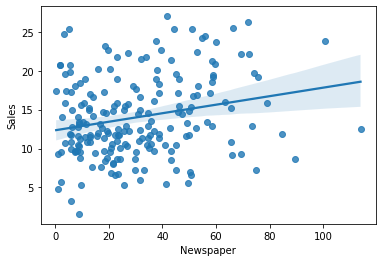

In [7]:
# Created a dataframe with columns named 'Newspaper' and 'Sales' filled with Newspaper data (x) and Sales data (y)
# from the advertising csv.
df = pd.DataFrame({"Newspaper": advertising['newspaper'], "Sales": advertising['sales']})

# Created an ordinary least squares regression on the data and show summary statistics.
# This formula regresses column 'Sales' on 'Newspaper'
ro = sm.OLS.from_formula("Sales ~ Newspaper", df)
res = ro.fit()
print(res.summary())

# Plot the data
sns.regplot('Newspaper', 'Sales', df)
plt.show()

The final regression compares Newspaper budget with Sales. The p-value for the Newspaper variable is 0.001, showing that Newspaper is significant. However, the R-Squared value for this regression is only 0.052, meaning only about 5% of the variance is explained by the model. This is not a very good value at all, and it is corroborated by the graph because very few of the data points are on the line or close to it. So, Newspaper buget is significant when predicting sales but a simple linear regression is probably not the best model to fit this data.